In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
col = [
    "Sex", 
    "Length", 
    "Diameter", 
    "Height", 
    "Whole_weight", 
    "Shucked_weight", 
    "Viscera_weight", 
    "Shell_weight", 
    "Rings"  
]
df= pd.read_csv("C:/Users/choha/Downloads/abalone (1)/abalone.data",header=None)
df.columns = col
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [63]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

C:\Users\choha\AppData\Local\Temp\ipykernel_51068\4252880765.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


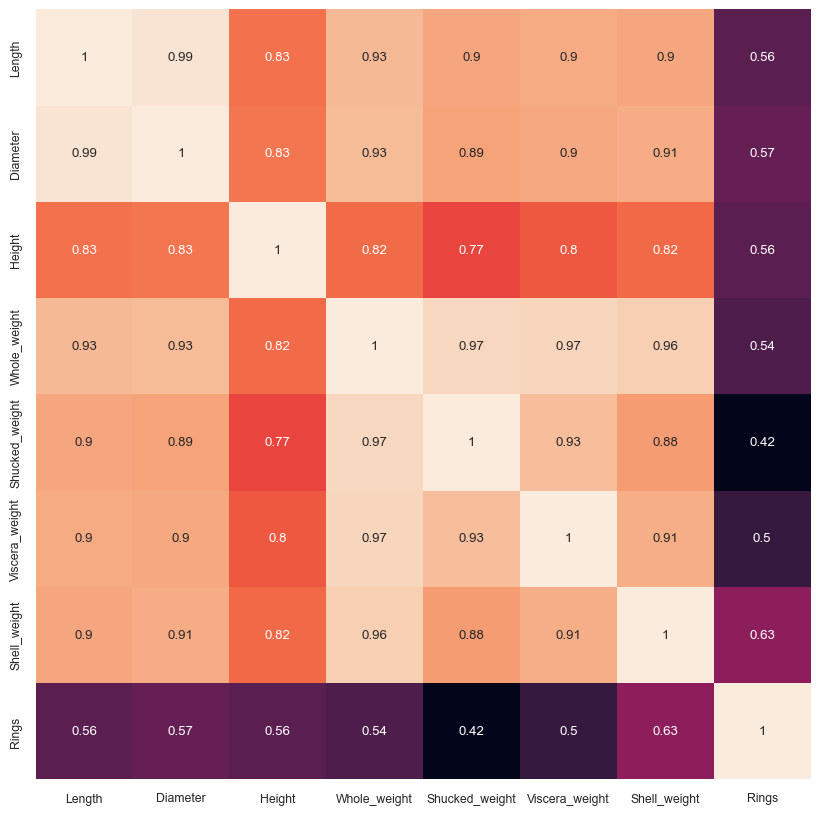

In [184]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [172]:
# 원-핫 인코딩
encoder = OneHotEncoder(sparse=False)
sex_encoded = encoder.fit_transform(df[['Sex']])
sex_encoded_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))


C:\Users\choha\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [173]:
# 인코딩된 데이터와 기존 데이터 결합
X = pd.concat([sex_encoded_df, df.drop(columns=['Sex', 'Rings'])], axis=1)
y = df['Rings']

In [174]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [176]:
# 결과 확인
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3341, 10)
y_train shape: (3341,)
X_test shape: (836, 10)
y_test shape: (836,)


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 4.885590311442836
평균제곱근오차 4.885590311442836
평균제곱근오차 4.885590311442836


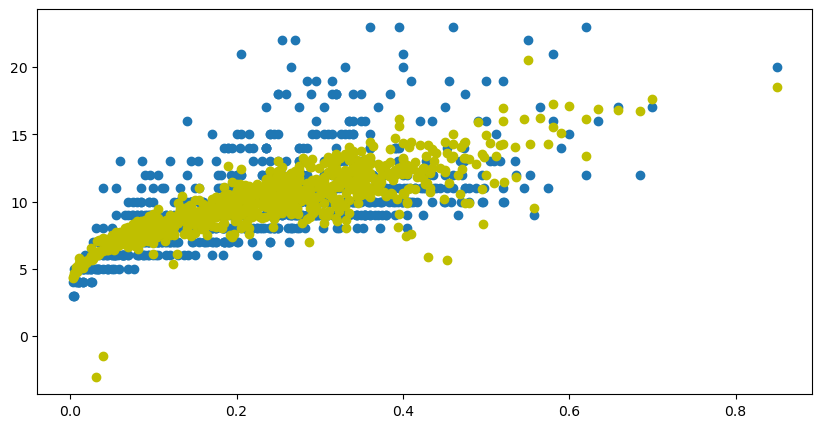

In [153]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test') # sepal length와 가장 연관성이 있는 피처가 petal length
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [178]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 9.379186602870814


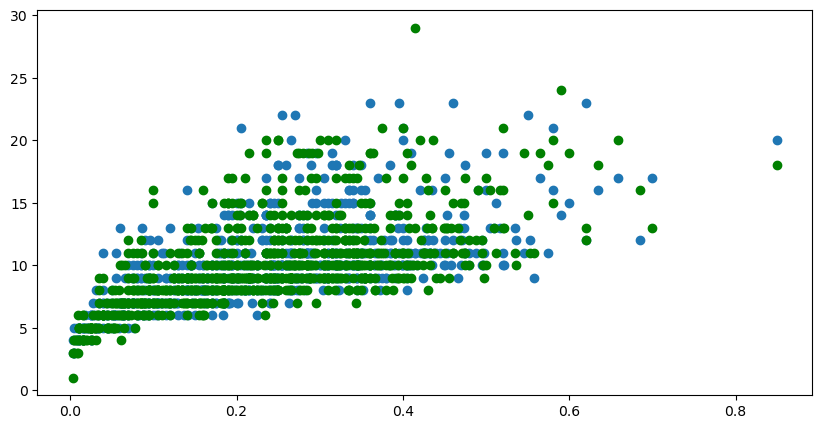

In [179]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()     

In [180]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.9906188995215315


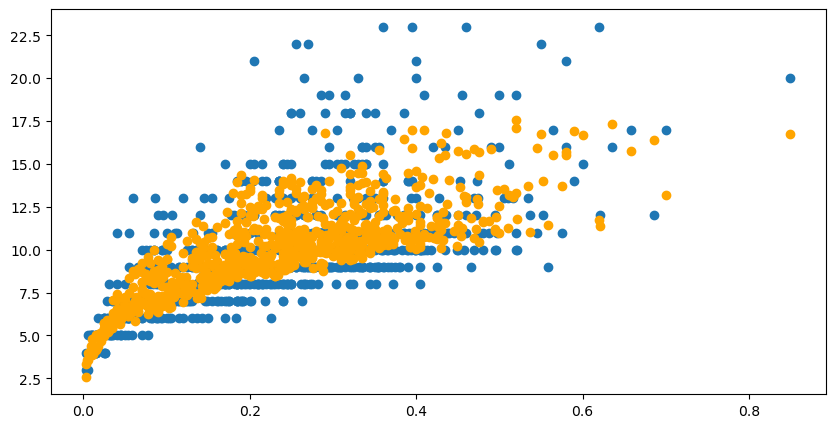

In [181]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()   

In [182]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.389260093441234


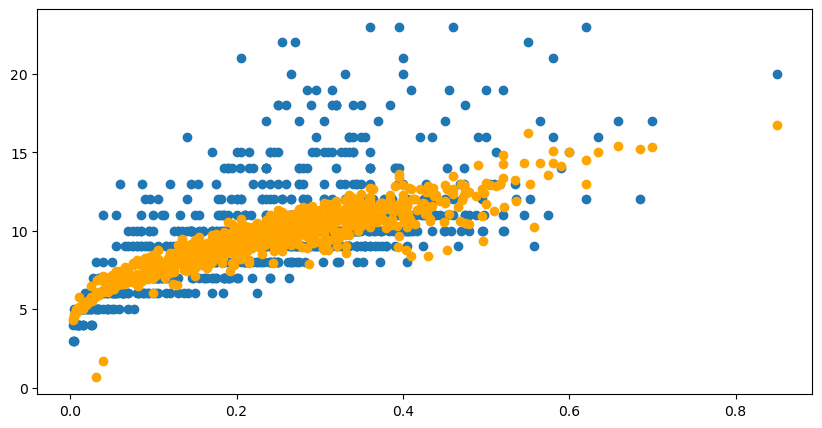

In [183]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()   

## Deep Learning

In [157]:
y = pd.get_dummies(y).values

In [158]:
y.shape

(4177, 28)

In [159]:
X = X.values

In [160]:
X.shape

(4177, 10)

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [162]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 10), (3341, 28), (836, 10), (836, 28))

In [167]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

# 입력 레이어 정의
inputs = Input(shape=(10,))

# 연속적인 레이어 추가
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

# 출력 레이어
outputs = Dense(1, activation=None)(x)  # 회귀 출력, 활성화 함수 없음

# 모델 생성
model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# 모델 요약 확인
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_44 (Dense)            (None, 64)                704       
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
# 모델 훈련
history = model.fit(x=X_train_scaled, y=y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# 예측
y_pred = model.predict(X_test_scaled)

Epoch 1/10
105/105 [==============================] - 1s 3ms/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 2/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 3/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 4/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 5/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 6/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 7/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 8/10
105/105 [==============================] - 0s 2ms/step - loss: 0.

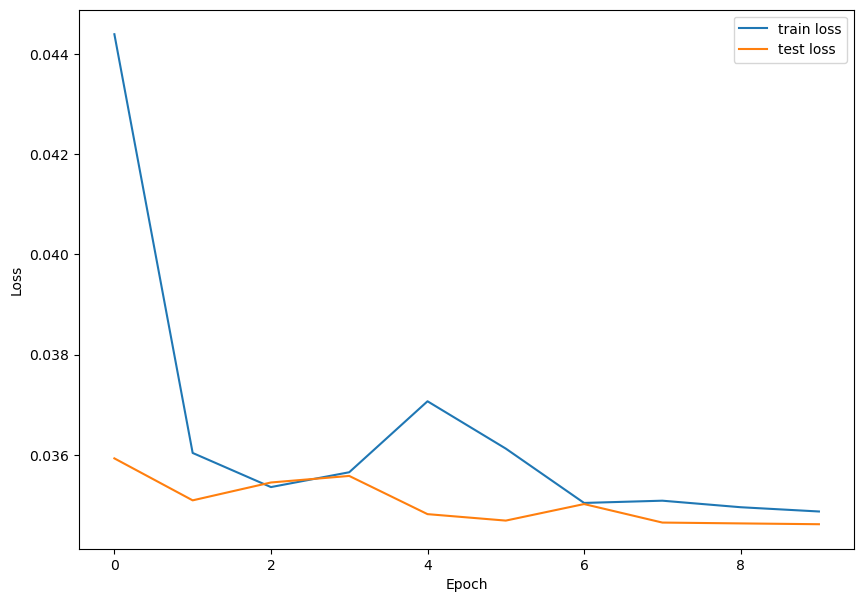

In [169]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [170]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.0377 - mse: 0.0377


[0.03774132952094078, 0.03774132952094078]